<a href="https://colab.research.google.com/github/Naomibarra/UMAP_ConvexHull/blob/main/Convex_Hull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install anndata
!pip install numpy
!pip install scanpy
!pip install matplotlib
!pip install scipy


In [13]:
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

adata=ad.read_h5ad("cell.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 4720 × 59236
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'


In [14]:
#Se extraen las coordenadas y los identificadores (cluster_id)
umap_coords= adata.obsm['X_UMAP']
cluster_ids=adata.obs['cluster_id']

#Data Frame para mostrar de forma organizada los registros
df=pd.DataFrame(umap_coords, columns=['UMAP_1', 'UMAP_2'])
df['cluster_id']=cluster_ids.values
#se imprimen los registros
print(df.head())

     UMAP_1    UMAP_2 cluster_id
0  1.823256 -9.120095         75
1  1.652221 -9.106577         75
2  1.817276 -9.226767         75
3  1.880684 -9.221494         75
4  1.878315 -9.399449         75


In [9]:
#Función que nos ayuda a calcular la orientación entre tres puntos
def orientacion(p, q, r):
  val=(q[1]-p[1])*(r[0]-q[0])-(q[0]-p[0])*(r[1]-q[1])
  if val==0:
    #Orientación Colineal
    return 0
  elif val>0:
    #Orientación en sentido horario
    return 1
  else:
    #Orientación en sentido antihorario
    return 2

In [15]:
#Función para calcular el Hull Convexo
def convex_hull(points):
  #se asegura de que al menos 3 puntos para poder hacer el convex_hull
  if len(points)<3:
    return[]

  l= np.argmin(points[:,0])
  hull=[]

  p=l
  while True:
    hull.append(p)
    q=(p+1)%len(points)

    for r in range(len(points)):
      if orientacion(points[p], points[q], points[r])==2:
        q=r
    p=q
    if p==l:
      break
  return np.array([points[i] for i in hull])



<ipython-input-17-82b29b55e269>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(clusters))


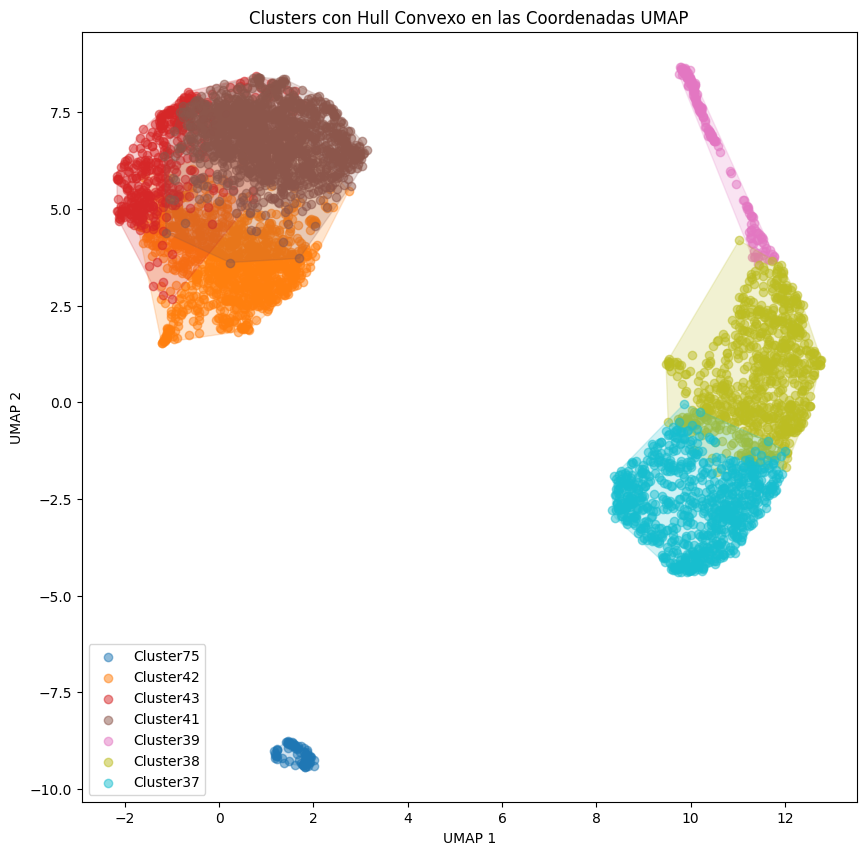

In [17]:
#se obtiene los clusters unicos
clusters= df['cluster_id'].unique()

plt.figure(figsize=(10,10))

#asignan colores unicos para cada cluster
colors = plt.cm.get_cmap('tab10', len(clusters))
for i, cluster in enumerate(clusters):
  #se filtra los puntos correspondientes del cluster actual
  cluster_points = df[df['cluster_id'] == cluster][['UMAP_1', 'UMAP_2']].values

  #Obtiene el hull convexo
  hull_points=convex_hull(cluster_points)

  #Grafica los puntos del cluster
  plt.scatter(cluster_points[:,0], cluster_points[:,1],
              color=colors(i), label=f'Cluster{cluster}', alpha=0.5)
  #Grafica el hull convexo
  plt.fill(hull_points[:,0], hull_points[:,1],
              color=colors(i), alpha=0.2)
#se muestra el grafico final
plt.legend()
plt.title('Clusters con Hull Convexo en las Coordenadas UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()